## Key Concepts

### Vocabulary
* <b>Bootstrap:</b> a method of sampling data by drawing values out of a population and replacing them so every value has an equally likely chance of being drawn on every selection
* <b>Sample Statistic:</b> a metric calculated for a sample of data drawn from a larger population
* <b>Data Distribution:</b> the frequency distribution of individual values in a data set
* <b>Sampling Distribution:</b> the frequency distribution of a sample <em>statistic</em> over many samples or resamples
* <b>Central Limit Theorem:</b> the tendency of the sampling distribution to take on a normal shape as sample size rises.
* <b>Standard Error:</b> the variability of a sample <em>statistic</em> over many samples. <b>Not to be confused with <em>standard deviation</em></b>, which refers to the variability of individual data <em>values</em>
* <b>Confidence Interval:</b> combines a point estimate with the uncertainty in that estimate
* <b>Confidence Level:</b> the percentage of confidence intervals, constructed in the same way from the same population, that are expected to contain the statistic of interest
* <b>Interval Endpoints:</b> the top and bottom of the confidence interval
* <b>t-distribution:</b> a normally shaped distribution, except that it is a bit thicker and longer on the tails. it is used extensively in depicting distributions of sample statistics. Distributions of sample means are typically shaped like a t-distribution. The larger the sample, the more normally shaped the t-distribution becomes.
* <b><em>n</em>:</b> sample size
* <b>Degrees of freedom:</b> a parameter that allows the t-distribution to adjust to different sample sizes, statistics, and number of groups
* <b>Test Statistic:</b> a metric for the difference or effect of interest
* <b>t-statistic:</b> a standardized version of common test statistics, such as means

### Key Ideas
* The frequency distribution of a <em>sample statistic</em> tells us how much that metric would turn out differently form sample to sample.
* A key metric that sums up the variability of a sample statistic is its <em>standard error</em>
* <em>Confidence intervals</em> are the typical way to present estimates as an interval range. The more data you have, the less variable a sample estimate will be
* The lower the level of confidence you can tolerate, the narrower the confidence interval will be.
* The <em>bootstrap</em> is an effective way to construct confidence intervals
* <b>The t-test is used to compare the differences between sample statistics of two groups.</b> When we get into ANOVA testing, which is based on the t-test, we can compare multiple groups at once. 

### Historical Context

![scatterplot showing that most of Constantine's governors served far longer than the expected three-year terms common throughout the rest of the Ottoman empire](Scatter-Tenure_RefLine_ColorBlind.png "Scatterplot of Constantinian Governors' Tenures")

The chart above suggests the ways in which Constantine, Algeria was unique among the rest of the Ottoman Empire's provinces in terms of governors’ tenures. Throughout the empire, governors were limited to three-year terms and then moved to a new location. By adding a reference line at three years, it is immediately obvious that Constantine is an outlier in the way that imperial service is carried out, as many governors served significantly longer than standard three-year term suggested in the historical literature. This is a clue that something unusual is happening in Algeria that might be worth paying attention to and suggests another question: Why were Constantine’s governors allowed to serve much longer terms than governors in other provinces? It also invites questions about what made certain governors successful, while others had barely started their terms before they were removed. The questions inspired by the chart above can be further investigated with inferential statistics, which is the focus of this tutorial.

### Data
Our data for this lesson is a listing of Ottoman provincial governors' names, dates in office, and tenure length in years for the following capitals:
* Constantine, Algeria
* Algiers, Algeria
* Damascus, Syria
* Cairo Egypt


## Inferential Statistics in R

Before we get to the Student's t-test, let's explore the data and develop some hypothesis that we can then examine with the t-test.

### ! Important !

When you apply this lesson to your own data, first <b>identify ratio (quantitative) data that you want to investigate based on a grouping strategy by a categorical data variable.</b> In this case, we are exploring tenure data, which is quantitative, specifically ratio, data. Rather than taking the population mean of tenure data (calculating the mean of tenure lengths for the entire data set), we're going to look at how the means differ across four different provincial capitals, which are categorical, specifcally, nominal data. 

### 1. Ensure you add the packages we will use in this lesson to your R workbook's library

In [1]:
#you can ignore the red box that will appear when you add dplyr to your library.
S
library(dplyr)
library(ggplot2)
library(ggpubr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### 2. Import data

<a href="https://www.dropbox.com/s/3oq38n9lctw8jik/OttomanGovData.csv?dl=0">Data</a> for this lesson can be found at the included hyperlink. Download and save it. Note its "path," the set of folders you need to direct the script to "walk through" to get to your file location. 

In [2]:
#import the data and save it as a name by which it can be referred throughout the lesson
OttomanGovData <- read.csv("~/Dropbox/Scholarship/AhmedBey/Comparative-GovData/OttomanGovData.csv")

#preview the data
head(OttomanGovData)

,Name,StartDate,EndDate,Tenure,CapitalCity,Country,Fate,Ethnicity,CapitalCode
,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>
1,Ramdane-Tchoulak Bey,1567,1574,7,Constantine,Algeria,Non-Violent Fate,Ottoman,0
2,Djaafar Bey,1574,1588,14,Constantine,Algeria,Non-Violent Fate,Ottoman,0
3,Mohammed Ben Ferhat Bey,1588,1608,20,Constantine,Algeria,Killed in battle,Algerian,0
4,Hassan Bey,1608,1622,14,Constantine,Algeria,Non-Violent Fate,Ottoman,0
5,Mourad bey,1622,1647,25,Constantine,Algeria,Killed in battle,Ottoman,0
6,Ferhat Bey,1647,1653,6,Constantine,Algeria,Non-Violent Fate,Ottoman,0


### 3. Begin by exploring the means of each group

In our case study, we will examine the mean tenure lengths of governors across four Ottoman provincial capitals.

In [7]:
#calculate means using the mean() function and slicing the data by your chosen groups, in this case, capitals.
#The print command reminds us what the number represents.
#Make sure to enclose the grouping category (i.e., "Constantine") in quotation marks.
print("The mean of governors' tenures in Constantine is: ")
mean(OttomanGovData$Tenure[OttomanGovData$CapitalCity=="Constantine"])

print("The mean of governors' tenures in Algiers is: ")
mean(OttomanGovData$Tenure[OttomanGovData$CapitalCity=="Algiers"])

print("The mean of governors' tenures in Damascus is:")
mean(OttomanGovData$Tenure[OttomanGovData$CapitalCity=="Damascus"])

print("The mean of governors' tenures in Cairo is: ")
mean(OttomanGovData$Tenure[OttomanGovData$CapitalCity=="Cairo"])

[1] "The mean of governors' tenures in Constantine is: "


[1] 5.854333

[1] "The mean of governors' tenures in Algiers is: "


[1] 3.078431

[1] "The mean of governors' tenures in Damascus is:"


[1] 1.428975

[1] "The mean of governors' tenures in Cairo is: "


[1] 1.959082

#### Observations
Be sure to write out your observations at this step, which will help you develop a sense for potential patterns in your data. 

In this case, I notice that the Constantine's mean tenure length is nearly double Algiers' mean, and it's roughly three times greater than the means for Damascus and Cairo, which adds evidence for our remarks in the introduction that something unusual seemed to happen in Constantine that did not occur in other provincial capitals. 


### 4. Calculate the standard deviations for each of the groups

In [8]:
#calculate standard deviations using the sd() function:

print("The standard deviation of governors' tenures in Constantine is: ")
sd(OttomanGovData$Tenure[OttomanGovData$CapitalCity=="Constantine"])

print("The standard deviation of governors' tenures in Algiers is: ")
sd(OttomanGovData$Tenure[OttomanGovData$CapitalCity=="Algiers"])

print("The standard deviation of governors' tenures in Damascus is:")
sd(OttomanGovData$Tenure[OttomanGovData$CapitalCity=="Damascus"])

print("The standard deviation of governors' tenures in Cairo is: ")
sd(OttomanGovData$Tenure[OttomanGovData$CapitalCity=="Cairo"])

[1] "The standard deviation of governors' tenures in Constantine is: "


[1] 6.810797

[1] "The standard deviation of governors' tenures in Algiers is: "


[1] 3.764572

[1] "The standard deviation of governors' tenures in Damascus is:"


[1] 1.77475

[1] "The standard deviation of governors' tenures in Cairo is: "


[1] 3.571662

#### Observations
Again, be sure to write out your observations at this step, which will help you develop a sense for potential patterns in your data. 

Again, Constantine stands out as unusual. Not only did its governors have the highest mean tenure length, but also, their tenures were the most variable. Algiers and Cairo follow with the next highest standard deviations, which are quite similar to one another, while Damascus experienced the least variability in governors' tenure lengths and had the lowest mean tenure length of the four Arab provincial capitals examined here.

### 5. Construct a box plot to visualize the summary statistics for the data



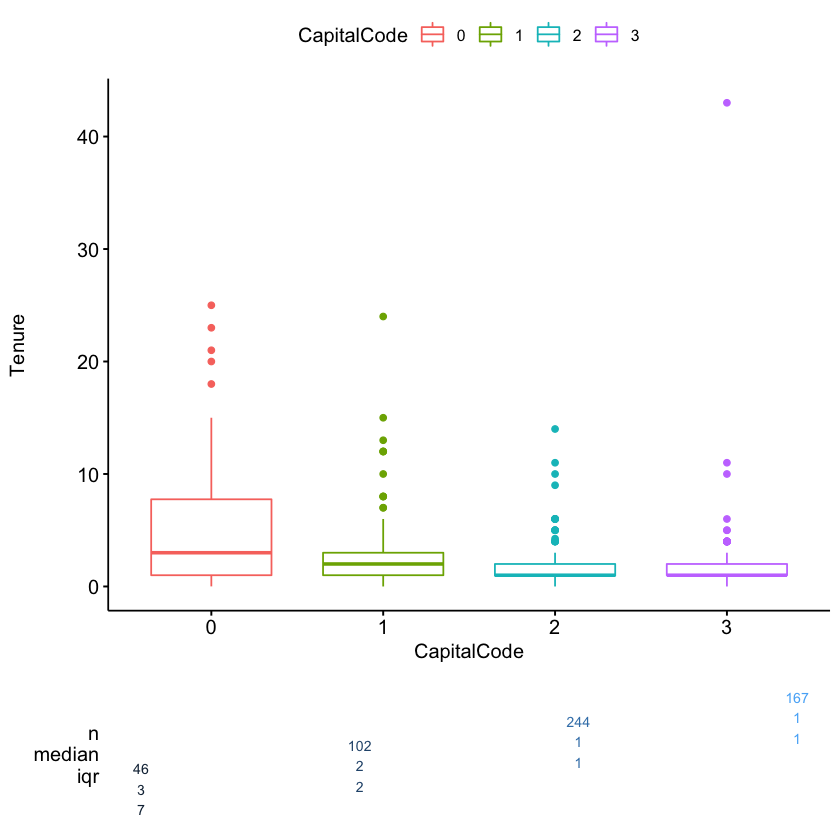

In [11]:
ggsummarystats(OttomanGovData, x="CapitalCode", y="Tenure", ggfunc=ggboxplot, color="CapitalCode")

#Red    (0) = Constantine
#Green  (1) = Algiers
#Blue   (2) = Damascus
#Purple (3) = Cairo

#### Observations 

The above box plots confirm what we noticed from our quantitative analysis of the tenure means across the four provincial capitals, notably that Constantine's governors seemed to generally hold office far longer than governors of other provinces, but their tenure lengths were also more variable. There is one notable exception to this rule in Cairo, which we would not have noticed without the boxplots. This extreme outlier skews Cairo's mean and slightly skews its standard deviation, a fact that should be remembered as we continue our analysis.

### 6. Generate a hypothesis to test with the Student's t-test

<b>Hypothesis:</b> The difference between the mean tenure lengths for Constantine's governors and the other Arab provinces in the dataset is both meaningful, as evidenced by the confidence interval, and statistically signficant, as evidenced by the p-value.

### 7. Ensure that the distribution of sample means from our dataset approximates the t-distribution

![alt text](t-distribution-smaller.png "t-distribution")

In [12]:
#calculate one sample mean from your dataset to see how the code works
#this is the bootstrap method because we replace the values for consideration in subsequent selections
mean(sample(OttomanGovData$Tenure[OttomanGovData$CapitalCode==0], size=30, replace=TRUE)) #Constantine

[1] 5.751644

In [15]:
#replicate bootstrap sampling and take the difference of the sample means between two groups
meanDiffs_Algeria <- replicate(100, mean(sample(OttomanGovData$Tenure[OttomanGovData$CapitalCode==0], size = 30, replace=TRUE)) - mean(sample(OttomanGovData$Tenure[OttomanGovData$CapitalCode==1], size=30, replace=TRUE)))

#preview data
head(meanDiffs_Algeria)

[1] 4.222770 2.690259 4.261111 3.786385 3.302778 2.256104

#### Create a histogram of the differences between the sample means from Constantine and Algeria to check that its shape approximates the t-distribution, shown above

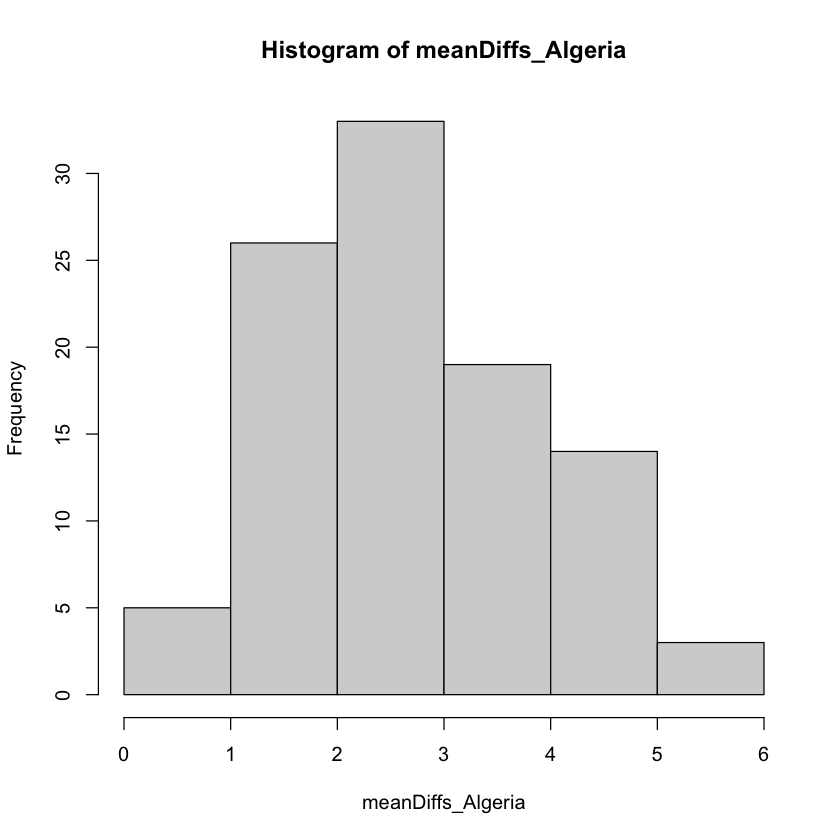

In [16]:
hist(meanDiffs_Algeria)

#### Observations

First, it is important to note that the distribution of the sample mean differences approximates the t-distribution, so we can apply the t-test in the next step. 

Secondly, based on the histogram above, it appears that Constantine's governors generally served about 3 years longer than those in Algiers. The next step is to calculate the range of the 95% confidence interval for the tenure mean differences between these two cities. 

### 8. Calculate 95% confidence interval of mean differences


In [17]:
#The first way to do this is to determine the 2.5% and 97.5% quantiles:
quantile(meanDiffs_Algeria, c(0.025, 0.975))

2.5%     97.5% 
0.8329041 5.0848164

The second way to calculate the confidence interval is with the Welch Two Sample t-test, which is based on the "Student's t-test," and further refined by 20th-century statistician Bernard Lewis Welch (1911-1989). Welch "made the test more capable with different kinds of 'unruly' data (more specifically, situations where the two groups have different levels of variability)." (Jeffrey M. Stanton, <em>Reasoning with Statistics</em>, 61-2).

In [19]:
t.test(OttomanGovData$Tenure[OttomanGovData$CapitalCode==0], OttomanGovData$Tenure[OttomanGovData$CapitalCode==1])


	Welch Two Sample t-test

data:  OttomanGovData$Tenure[OttomanGovData$CapitalCode == 0] and OttomanGovData$Tenure[OttomanGovData$CapitalCode == 1]
t = 2.5915, df = 57.766, p-value = 0.01208
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.6315854 4.9202177
sample estimates:
mean of x mean of y 
 5.854333  3.078431 


#### Observations

The t-test results present a 95% confidence interval of 0.63 to 4.92 years. This means that population mean difference of governors' tenures in Constantine and Algiers falls between these two values, which is to say that governors in Constantine generally served between 0.63 and 4.92 years longer than governors in Algiers. 

In [21]:
#we can also run the following simple calculations to repor the results in a slightly different manner
(0.63 + 4.92)/2
4.92 - ((0.63+4.92)/2)

[1] 2.775

[1] 2.145

The other way to report our findings is to say that governors in Constantine generally served about 2.78 years longer than those in Algiers, plus or minus 2.15 years.

### 9. Comparison between different groups

In this final step, I'm going to compare the mean differences between Constantine and the other two Ottoman provincial capitals in predominately Arab regions, and just out of curiousity, I'll compare Cairo and Damascus, which <b>seem</b> to be far more similar than different, especially when considered alongside the governors based in the two Algerian capitals. 

In [22]:
#Comparing Constantine with Damascus
t.test(OttomanGovData$Tenure[OttomanGovData$CapitalCode==0], OttomanGovData$Tenure[OttomanGovData$CapitalCode==2])


	Welch Two Sample t-test

data:  OttomanGovData$Tenure[OttomanGovData$CapitalCode == 0] and OttomanGovData$Tenure[OttomanGovData$CapitalCode == 2]
t = 4.3789, df = 46.158, p-value = 6.789e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 2.391305 6.459410
sample estimates:
mean of x mean of y 
 5.854333  1.428975 


#### Observations

The t-test results present a 95% confidence interval of 2.39 to 6.46 years. This means that population mean difference of governors' tenures in Constantine and Damascus falls between these two values, which is to say that governors in Constantine generally served between 2.39 and 6.46 years longer (<b>signficantly longer!</b>) than governors in Damascus.

In [24]:
#Comparing Constantine with Cairo
t.test(OttomanGovData$Tenure[OttomanGovData$CapitalCode==0], OttomanGovData$Tenure[OttomanGovData$CapitalCode==3])


	Welch Two Sample t-test

data:  OttomanGovData$Tenure[OttomanGovData$CapitalCode == 0] and OttomanGovData$Tenure[OttomanGovData$CapitalCode == 3]
t = 3.7399, df = 51.995, p-value = 0.0004601
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.805249 5.985253
sample estimates:
mean of x mean of y 
 5.854333  1.959082 


#### Observations

The t-test results present a 95% confidence interval of 1.81 to 5.99 years. This means that population mean difference of governors' tenures in Constantine and Cairo falls between these two values, which is to say that governors in Constantine generally served between 1.81 and 5.99 years longer than governors in Cairo. 

In [25]:
#Comparing Damascus with Cairo
t.test(OttomanGovData$Tenure[OttomanGovData$CapitalCode==2], OttomanGovData$Tenure[OttomanGovData$CapitalCode==3])


	Welch Two Sample t-test

data:  OttomanGovData$Tenure[OttomanGovData$CapitalCode == 2] and OttomanGovData$Tenure[OttomanGovData$CapitalCode == 3]
t = -1.774, df = 222.5, p-value = 0.07744
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.11899639  0.05878353
sample estimates:
mean of x mean of y 
 1.428975  1.959082 


#### Observations

Finally, the t-test results present a 95% confidence interval of -1.12 to 0.06 years. This means that population mean difference of governors' tenures in Damascus and Cairo falls between these two values, which is to say that governors in Damascus generally served between 1.12 years less and 0.06 years more than governors in Cairo, a rather insignificant difference, especially when compared with the mean difference confidence intervals for Constantine and the rest of the provincial capitals. 

### (Optional reading) Additional Historical Background

Between the sixteenth and seventeenth centuries, transformations in the Ottoman Empire’s provincial administration ultimately encouraged far-flung Ottoman officials to establish roots in their assigned frontier region. In response to the evolution of European military tactics, Sultan Murad III (r. 1574-1595) diminished the number of cavalrymen and increased the number of imperial household troops. This shift narrowed the avenues from provincial leadership positions to higher office in the metropole. Ottoman historian İ. Metin Kunt reports that “from the 1570s to the 1580s, the ratio of new sancakbeyi [district commanders] from provincial administration ranks fell from two-thirds to half of all new appointees, while the share of those from central administration rose to 44.6 percent.”  Administrators who were stationed in the provinces were less likely to be called back to the imperial center or reassigned to a different province. 

The data on Constantine’s early governors reflects this change.  After their terms ended, the first two Ottoman governors of Algeria’s eastern district received new appointments to different provinces. Thereafter, most Ottoman officials who traveled to the frontier outpost of Algeria remained there. An imperial official’s best opportunities, then, lay in the distant province to which he had been assigned. The surest method to climb the administrative ladder in Algeria proved to be through real and fictive kinship networks and household connections. From Mohammed Pasha’s installation of Constantine’s first governor in 1567, beys served longer than their allotted three-year term. Interrupted only by governors’ deaths, this practice continued until the French conquest of the provincial capital in 1837. Across the Ottoman Empire, this was highly unusual; only four to six percent of beys in other provinces served longer than the standard three-year term.

After Sultan Murad III signed a truce with Habsburg Emperor Philip II in 1580, Algeria became increasingly marginalized within the Ottoman Empire.  As a result, the janissaries sent to the frontier region stayed for the duration of their service. Through their long sojourn, the janissaries grew even more powerful. Beginning in the seventeenth century, the internal governing council, or council, consisting of corsair leaders and janissary officers, became one of the primary training grounds for men who were promoted to serve as dey in Algiers and governors in the western and eastern territories.  Enrollment, voluntarily or not, into the janissary corps provided young men with the opportunity to cultivate patronage relationships, foster support among their peers, and gain valuable leadership experience. All three proved essential factors in the success of Ottoman officials when they reached the upper echelons of the military-administrative ranks, but they were not sufficient conditions to ensure a governor’s success in the province of Constantine, as their fates reveal.
